# Colab

In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
os.chdir("/content/gdrive/Othercomputers/retep's PC/bias gpt")

# Head

In [2]:
import torch, importlib
from transformers import GPT2LMHeadModel, GPT2Tokenizer, AdamW
from torch.optim.lr_scheduler import CosineAnnealingLR
import matplotlib.pyplot as plt

model_name = "distilgpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
prompt = "\n"
sentence = prompt + open('Genshin Impact.txt').read().replace('\n', ' ')
inputs = tokenizer(sentence, return_tensors="pt")
input_ids = inputs["input_ids"][:,:128]
input_ids[0,-1] = tokenizer.eos_token_id
mask = inputs['attention_mask'][:,:128]
mask[:,:20] *= 0

# Train

In [3]:
import BiasGPT
importlib.reload(BiasGPT)
from BiasGPT import BiasGPT

biasGPT = BiasGPT.train_bias(input_ids, epochs = 50, lr = 0.25, log = True)
print(biasGPT.bias_mu.mean().item(), biasGPT.bias_mu.std().item())

Epoch: 1; Loss: (3.606, 0.0); lr: 0.25
Epoch: 2; Loss: (2.364, 0.062); lr: 0.24975334105353394
Epoch: 3; Loss: (1.549, 0.139); lr: 0.24901433766430975
Epoch: 4; Loss: (1.096, 0.212); lr: 0.2477859063410861
Epoch: 5; Loss: (0.75, 0.268); lr: 0.24607289514107888
Epoch: 6; Loss: (0.563, 0.309); lr: 0.2438820645368942
Epoch: 7; Loss: (0.424, 0.34); lr: 0.24122206073603142
Epoch: 8; Loss: (0.328, 0.362); lr: 0.23810338155825245
Epoch: 9; Loss: (0.233, 0.371); lr: 0.23453833500548293
Epoch: 10; Loss: (0.262, 0.373); lr: 0.23054099068775188
Epoch: 11; Loss: (0.215, 0.369); lr: 0.22612712429686843
Epoch: 12; Loss: (0.223, 0.363); lr: 0.22131415534697366
Epoch: 13; Loss: (0.19, 0.354); lr: 0.21612107842767644
Epoch: 14; Loss: (0.181, 0.343); lr: 0.2105683882410861
Epoch: 15; Loss: (0.147, 0.331); lr: 0.20467799871858622
Epoch: 16; Loss: (0.141, 0.319); lr: 0.19847315653655917
Epoch: 17; Loss: (0.133, 0.308); lr: 0.19197834937237457
Epoch: 18; Loss: (0.165, 0.298); lr: 0.1852192092627144
Epoch: 

In [25]:
test = BiasGPT()
noise = torch.randn_like(biasGPT.bias_mu)
test.bias_mu = torch.nn.Parameter(noise * 0.5)

model = GPT2LMHeadModel.from_pretrained(model_name)
test.set_bias_to(model, 0, do_sample = False)

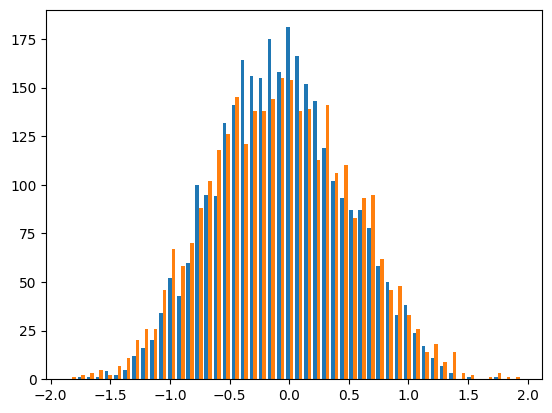

In [5]:
plt.hist(test.bias_mu[:,0,0].detach(), bins=50)
plt.show()

In [21]:
with torch.no_grad():
    tokens = model(input_ids)[0][0].argmax(-1)
print(tokenizer.decode(tokens))
print((tokens[:-1] != input_ids[0, 1:]).sum().item())

The. of�

 new of of the Land of Magic
  to
 on the on on on March of
 theenshin is is been on lead world by storm.
 the new,-, it graphics, and aivating visuals, G is--playing is isor) is the a lot amount following.
 is isves into the is itenshin so so great in in the world market of the-.

 masteror of un by of
 of theenshin's's most popular features is the abilityly-,
 game is on in the same world of thehotene,A
89


In [26]:
test_ids = tokenizer(prompt, return_tensors="pt").input_ids
if torch.cuda.is_available():
   test_ids = test_ids.to('cuda')

generated_ids = model.generate(
    test_ids,
    max_length = 128,
    num_return_sequences = 1,
    no_repeat_ngram_size = 5,
    num_beams = 5,
    eos_token_id = 50256,
    bad_words_ids = [[198]],
)

# 解码生成的文本
generated_text = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)
print(generated_text[0])
print(len(generated_ids[0]))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



 A man who was in his late-fifties and early-fifties was shot and killed when he was in his mid-thirties and early-e-thirties, the state-of-the-art-of-it-and-it-all-in-a-way-in-the-e-th-ies-and-a-th-ie-s-and-c-c-a-a-th, the state- of-the-o-th-ies, and the state- of the-o-thies-and-e-th
128


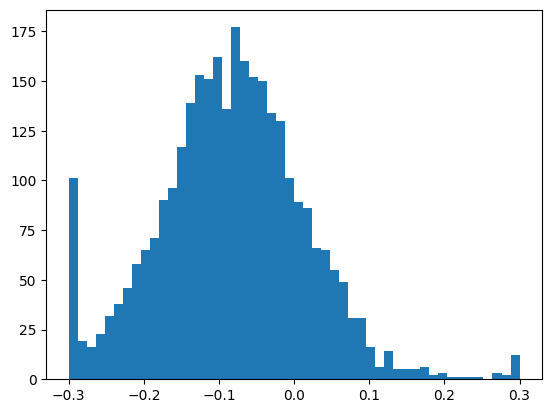

In [16]:
model = GPT2LMHeadModel.from_pretrained(model_name)
plt.hist(model.transformer.h[-2].mlp.c_fc.bias.detach().clamp(-0.3, 0.3), bins=50)
plt.show()

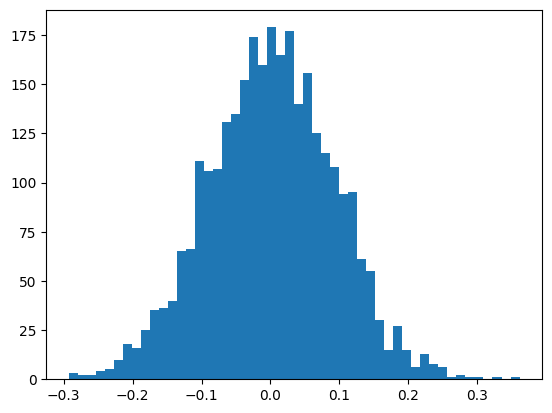

In [17]:
plt.hist(torch.randn(3000) * 0.09, bins=50)
plt.show()

# old version

In [172]:
model = GPT2LMHeadModel.from_pretrained(model_name)
for name, param in model.named_parameters():
    if 'mlp' in name and 'bias' in name:
        print(name, param.std())
        with torch.no_grad():
            param += torch.randn_like(param) * 0.1

transformer.h.0.mlp.c_fc.bias tensor(0.1347, grad_fn=<StdBackward0>)
transformer.h.0.mlp.c_proj.bias tensor(0.1006, grad_fn=<StdBackward0>)
transformer.h.1.mlp.c_fc.bias tensor(0.1125, grad_fn=<StdBackward0>)
transformer.h.1.mlp.c_proj.bias tensor(0.1126, grad_fn=<StdBackward0>)
transformer.h.2.mlp.c_fc.bias tensor(0.1000, grad_fn=<StdBackward0>)
transformer.h.2.mlp.c_proj.bias tensor(0.1359, grad_fn=<StdBackward0>)
transformer.h.3.mlp.c_fc.bias tensor(0.0983, grad_fn=<StdBackward0>)
transformer.h.3.mlp.c_proj.bias tensor(0.1322, grad_fn=<StdBackward0>)
transformer.h.4.mlp.c_fc.bias tensor(0.1029, grad_fn=<StdBackward0>)
transformer.h.4.mlp.c_proj.bias tensor(0.1688, grad_fn=<StdBackward0>)
transformer.h.5.mlp.c_fc.bias tensor(0.0946, grad_fn=<StdBackward0>)
transformer.h.5.mlp.c_proj.bias tensor(0.1121, grad_fn=<StdBackward0>)


In [2]:
model = GPT2LMHeadModel.from_pretrained(model_name)
if torch.cuda.is_available():
   model.cuda()
   input_ids = input_ids.to('cuda')

for param in model.parameters():
    param.requires_grad = False

cnt = 0
parameters = []
for name, param in model.named_parameters():
    if ('5' in name or '4' in name) and 'mlp' in name and 'bias' in name:
        print(name)
        param.requires_grad = True
        cnt += param.numel()
        parameters.append(param)
print(cnt)


epochs = 50
optimizer = torch.optim.AdamW(parameters, lr = 0.25, weight_decay = 0.5)
scheduler = CosineAnnealingLR(optimizer, T_max=epochs, eta_min=0)
loss_fn = torch.nn.CrossEntropyLoss(reduction = 'none')

for epoch in range(epochs):
    outputs = model(input_ids, labels=input_ids)
    loss = outputs.loss
    print(f"Loss: {loss.item()}; lr: {scheduler.get_last_lr()}", epoch)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    scheduler.step()

print(parameters[0].std(), parameters[1].std())

transformer.h.4.mlp.c_fc.bias
transformer.h.4.mlp.c_proj.bias
transformer.h.5.mlp.c_fc.bias
transformer.h.5.mlp.c_proj.bias
7680
Loss: 3.46999192237854; lr: [0.25] 0
Loss: 1.984029769897461; lr: [0.24975334105353394] 1
Loss: 1.2573615312576294; lr: [0.24901433766430975] 2
Loss: 0.8108722567558289; lr: [0.2477859063410861] 3
Loss: 0.44826892018318176; lr: [0.24607289514107888] 4
Loss: 0.2510022222995758; lr: [0.2438820645368942] 5
Loss: 0.1697864830493927; lr: [0.24122206073603142] 6
Loss: 0.10654934495687485; lr: [0.23810338155825245] 7
Loss: 0.0937390848994255; lr: [0.23453833500548293] 8
Loss: 0.058866191655397415; lr: [0.23054099068775188] 9
Loss: 0.04646272584795952; lr: [0.22612712429686843] 10
Loss: 0.03997423127293587; lr: [0.22131415534697366] 11
Loss: 0.03278852626681328; lr: [0.21612107842767644] 12
Loss: 0.027442505583167076; lr: [0.2105683882410861] 13
Loss: 0.02428673394024372; lr: [0.20467799871858622] 14
Loss: 0.022283487021923065; lr: [0.19847315653655917] 15
Loss: 0.02